In [220]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [221]:
#!pip install pandas-profiling

In [222]:
#import pandas_profiling

In [223]:
#profile = pandas_profiling.ProfileReport(df)
#profile

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
import os
import warnings

from operator import add

#MEDIUM_SIZE = 10
#SMALL_SIZE = 8
#MEDIUM_SIZE = 10
#BIGGER_SIZE = 12

%matplotlib inline
#warnings.filterwarnings('ignore')

#print(os.listdir("../input"))
#os.chdir("../input")

In [225]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


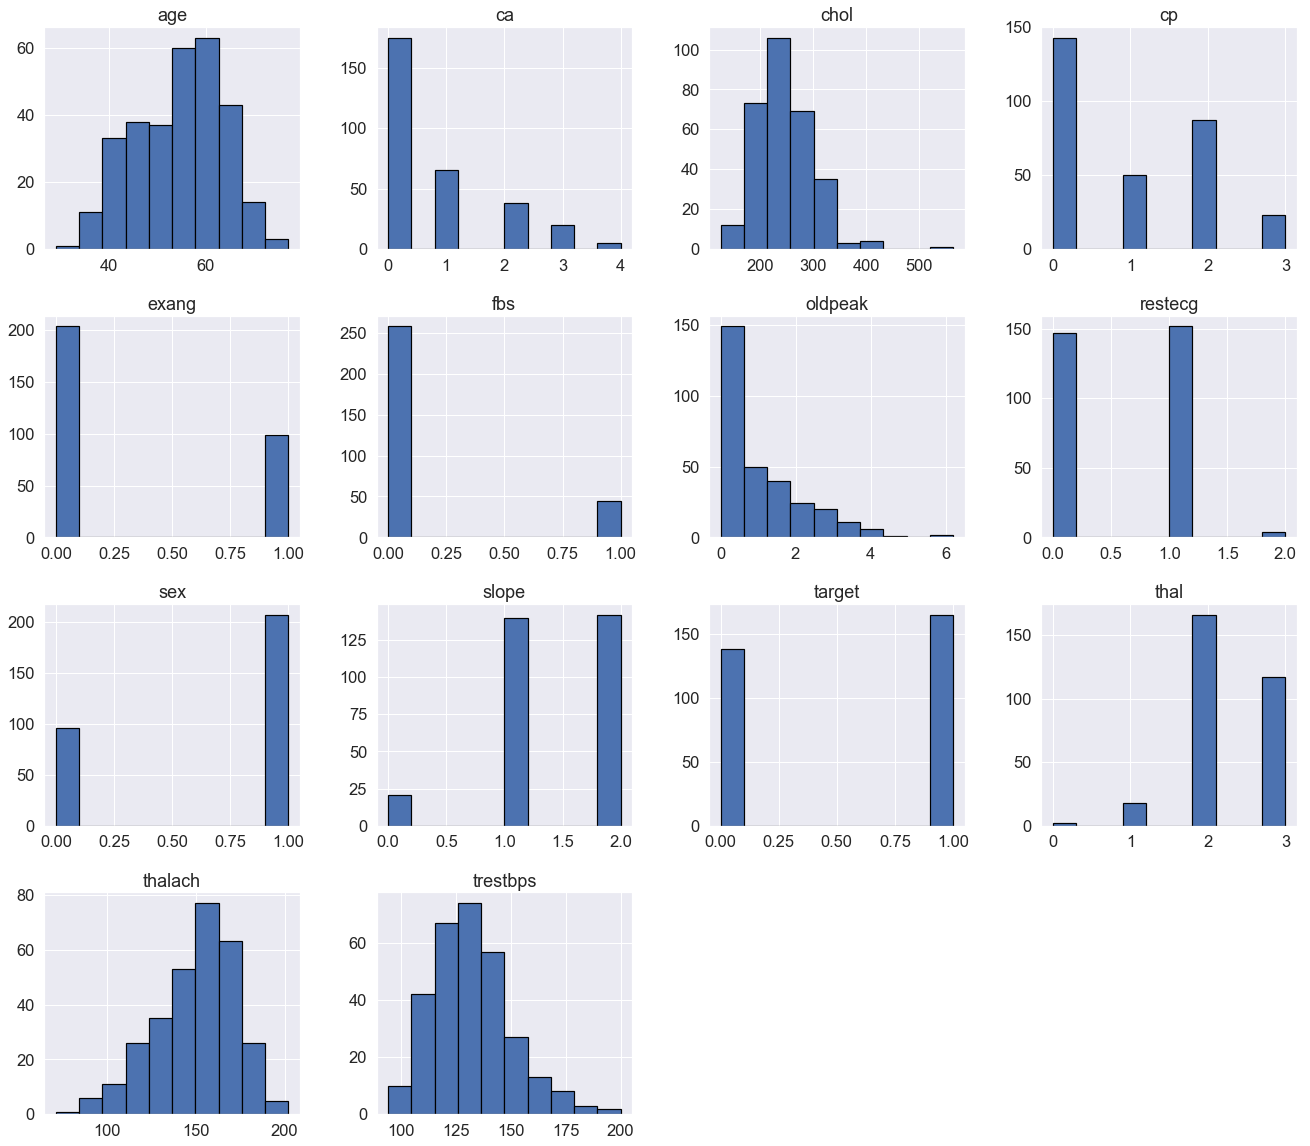

In [226]:
# Visulazing the distibution of the data for every feature
sns.set(font_scale=1.5)
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));
plt.savefig("distribution.png",bbox_inches="tight",pad_inches=2)

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
import os
import warnings

from operator import add

#MEDIUM_SIZE = 10
#SMALL_SIZE = 8
#MEDIUM_SIZE = 10
#BIGGER_SIZE = 12

%matplotlib inline
#warnings.filterwarnings('ignore')

#print(os.listdir("../input"))
#os.chdir("../input")

In [228]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [229]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


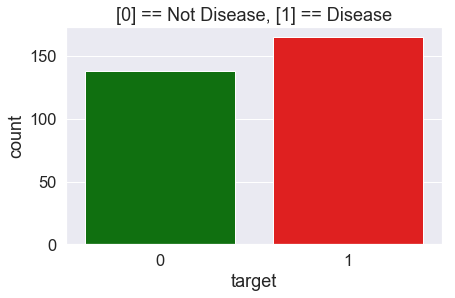

In [230]:
sns.countplot(df.target, palette=['green', 'red'])
plt.title("[0] == Not Disease, [1] == Disease")
plt.savefig("Target.png",bbox_inches="tight",pad_inches=2)

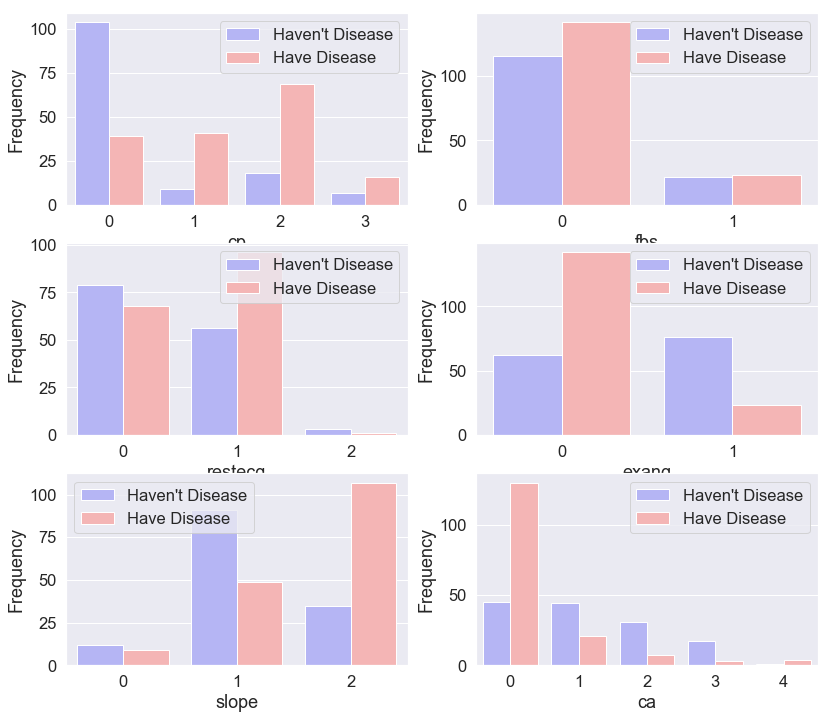

In [231]:
fig, axes = plt.subplots(3, 2, figsize=(12,12))
fs = ['cp', 'fbs', 'restecg','exang', 'slope', 'ca']
for i, axi in enumerate(axes.flat):
    sns.countplot(x=fs[i], hue='target', data=df, palette='bwr', ax=axi) 
    axi.set(ylabel='Frequency')
    axi.legend(["Haven't Disease", "Have Disease"])
    
plt.savefig("categorical.png",bbox_inches="tight",pad_inches=2)    

In [232]:
def draw_semi_pie_chart(data, column, fig, renamed_index_dict, title):
    default_colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666']
    rnd.shuffle(default_colors)
    ax = df[column].value_counts().rename(index = renamed_index_dict).plot.pie(colors = default_colors, autopct='%1.1f%%', startangle=90, title = title)
    ax.set_ylabel('')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20)
        
    centre_circle = plt.Circle((0,0), 0.70, fc='white')
    fig.gca().add_artist(centre_circle)

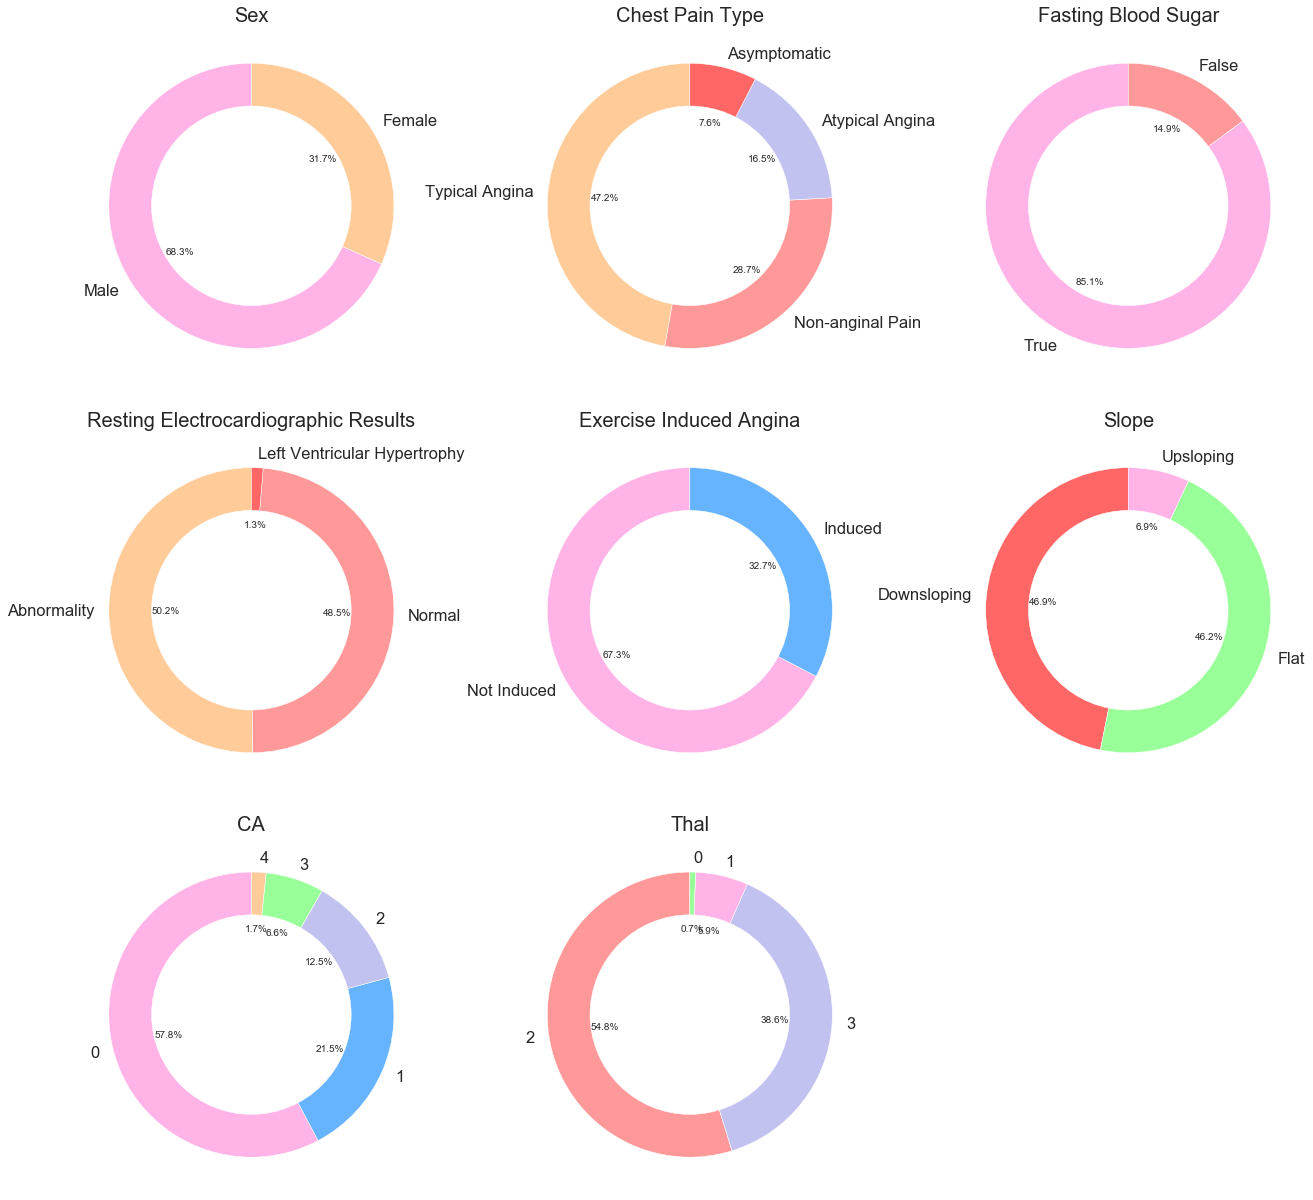

In [324]:
fig = plt.gcf()
fig.set_size_inches(18, 17)
grid_rows = 3
grid_cols = 3

# Draw Sex Pie chart
plt.subplot(grid_rows, grid_cols, 1)
draw_semi_pie_chart(df, 'sex', fig, {0: 'Female', 1: 'Male'}, 'Sex')

# Draw Chest pain type chart
plt.subplot(grid_rows, grid_cols, 2)
draw_semi_pie_chart(df, 'cp', fig, {0:'Typical Angina', 1:'Atypical Angina', 2:'Non-anginal Pain',3:'Asymptomatic'}, 'Chest Pain Type')

# Draw Fasting blood sugar chart
plt.subplot(grid_rows, grid_cols, 3)
draw_semi_pie_chart(df, 'fbs', fig, {0:'True', 1:'False'}, 'Fasting Blood Sugar')

# Draw restecg - resting electrocardiographic results
plt.subplot(grid_rows, grid_cols, 4)
draw_semi_pie_chart(df, 'restecg', fig, {0:'Normal', 1:'Abnormality', 2:'Left Ventricular Hypertrophy'}, 'Resting Electrocardiographic Results')

# Draw exang - exercise induced angina
plt.subplot(grid_rows, grid_cols, 5)
draw_semi_pie_chart(df, 'exang', fig, {0:'Not Induced', 1:'Induced'}, 'Exercise Induced Angina')

# Draw exang - exercise induced angina
plt.subplot(grid_rows, grid_cols, 6)
draw_semi_pie_chart(df, 'slope', fig, {0:'Upsloping', 1:'Flat', 2:'Downsloping'}, 'Slope')

# Draw ca
plt.subplot(grid_rows, grid_cols, 7)
draw_semi_pie_chart(df, 'ca', fig, {0:'0', 1:'1', 2:'2', 3:'3', 4:'4'}, 'CA')

# Draw thal
plt.subplot(grid_rows, grid_cols, 8)
draw_semi_pie_chart(df, 'thal', fig, {0:'0', 1:'1', 2:'2', 3:'3'}, 'Thal')

fig.tight_layout()
#plt.show()
plt.savefig("Dataset_Distribution.png",bbox_inches="tight",pad_inches=2)


In [234]:
def create_percent_stacked_barchart(data, title = None, ylabel = None, xlabel = None):
    default_colors = ['#019600', '#3C5F5A', '#219AD8']
    # From raw value to percentage
    totals = data.sum(axis=1)
    bars = ((data.T / totals) * 100).T
    r = list(range(data.index.size))

    # Plot
    barWidth = 0.95
    names = data.index.tolist()
    bottom = [0] * bars.shape[0]

    # Create bars
    color_index = 0
    plots = []
    for bar in bars.columns:
        plots.append(plt.bar(r, bars[bar], bottom=bottom, color=default_colors[color_index], edgecolor='white', width=barWidth))
        bottom = list(map(add, bottom, bars[bar]))
        color_index = 0 if color_index >= len(default_colors) else color_index + 1

    # Custom x axis
    plt.title(title)
    plt.xticks(r, names)
    plt.xlabel(data.index.name if xlabel is None else xlabel)
    plt.ylabel(data.columns.name if ylabel is None else ylabel)
    ax = plt.gca()
        
    y_labels = ax.get_yticks()
    ax.set_yticklabels([str(y) + '%' for y in y_labels])

    flat_list = [item for sublist in data.T.values for item in sublist]
    for i, d in zip(ax.patches, flat_list):
        data_label = str(d) + " (" + str(round(i.get_height(), 2)) + "%)"
        ax.text(i.get_x() + 0.45, i.get_y() + 5, data_label, horizontalalignment='center', verticalalignment='center', fontdict = dict(color = 'white', size = 20))

    for item in ([ax.title]):
        item.set_fontsize(27)
        
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(24)
    
    legend = ax.legend(plots, bars.columns.tolist(), fancybox=True)
    plt.setp(legend.get_texts(), fontsize='20')

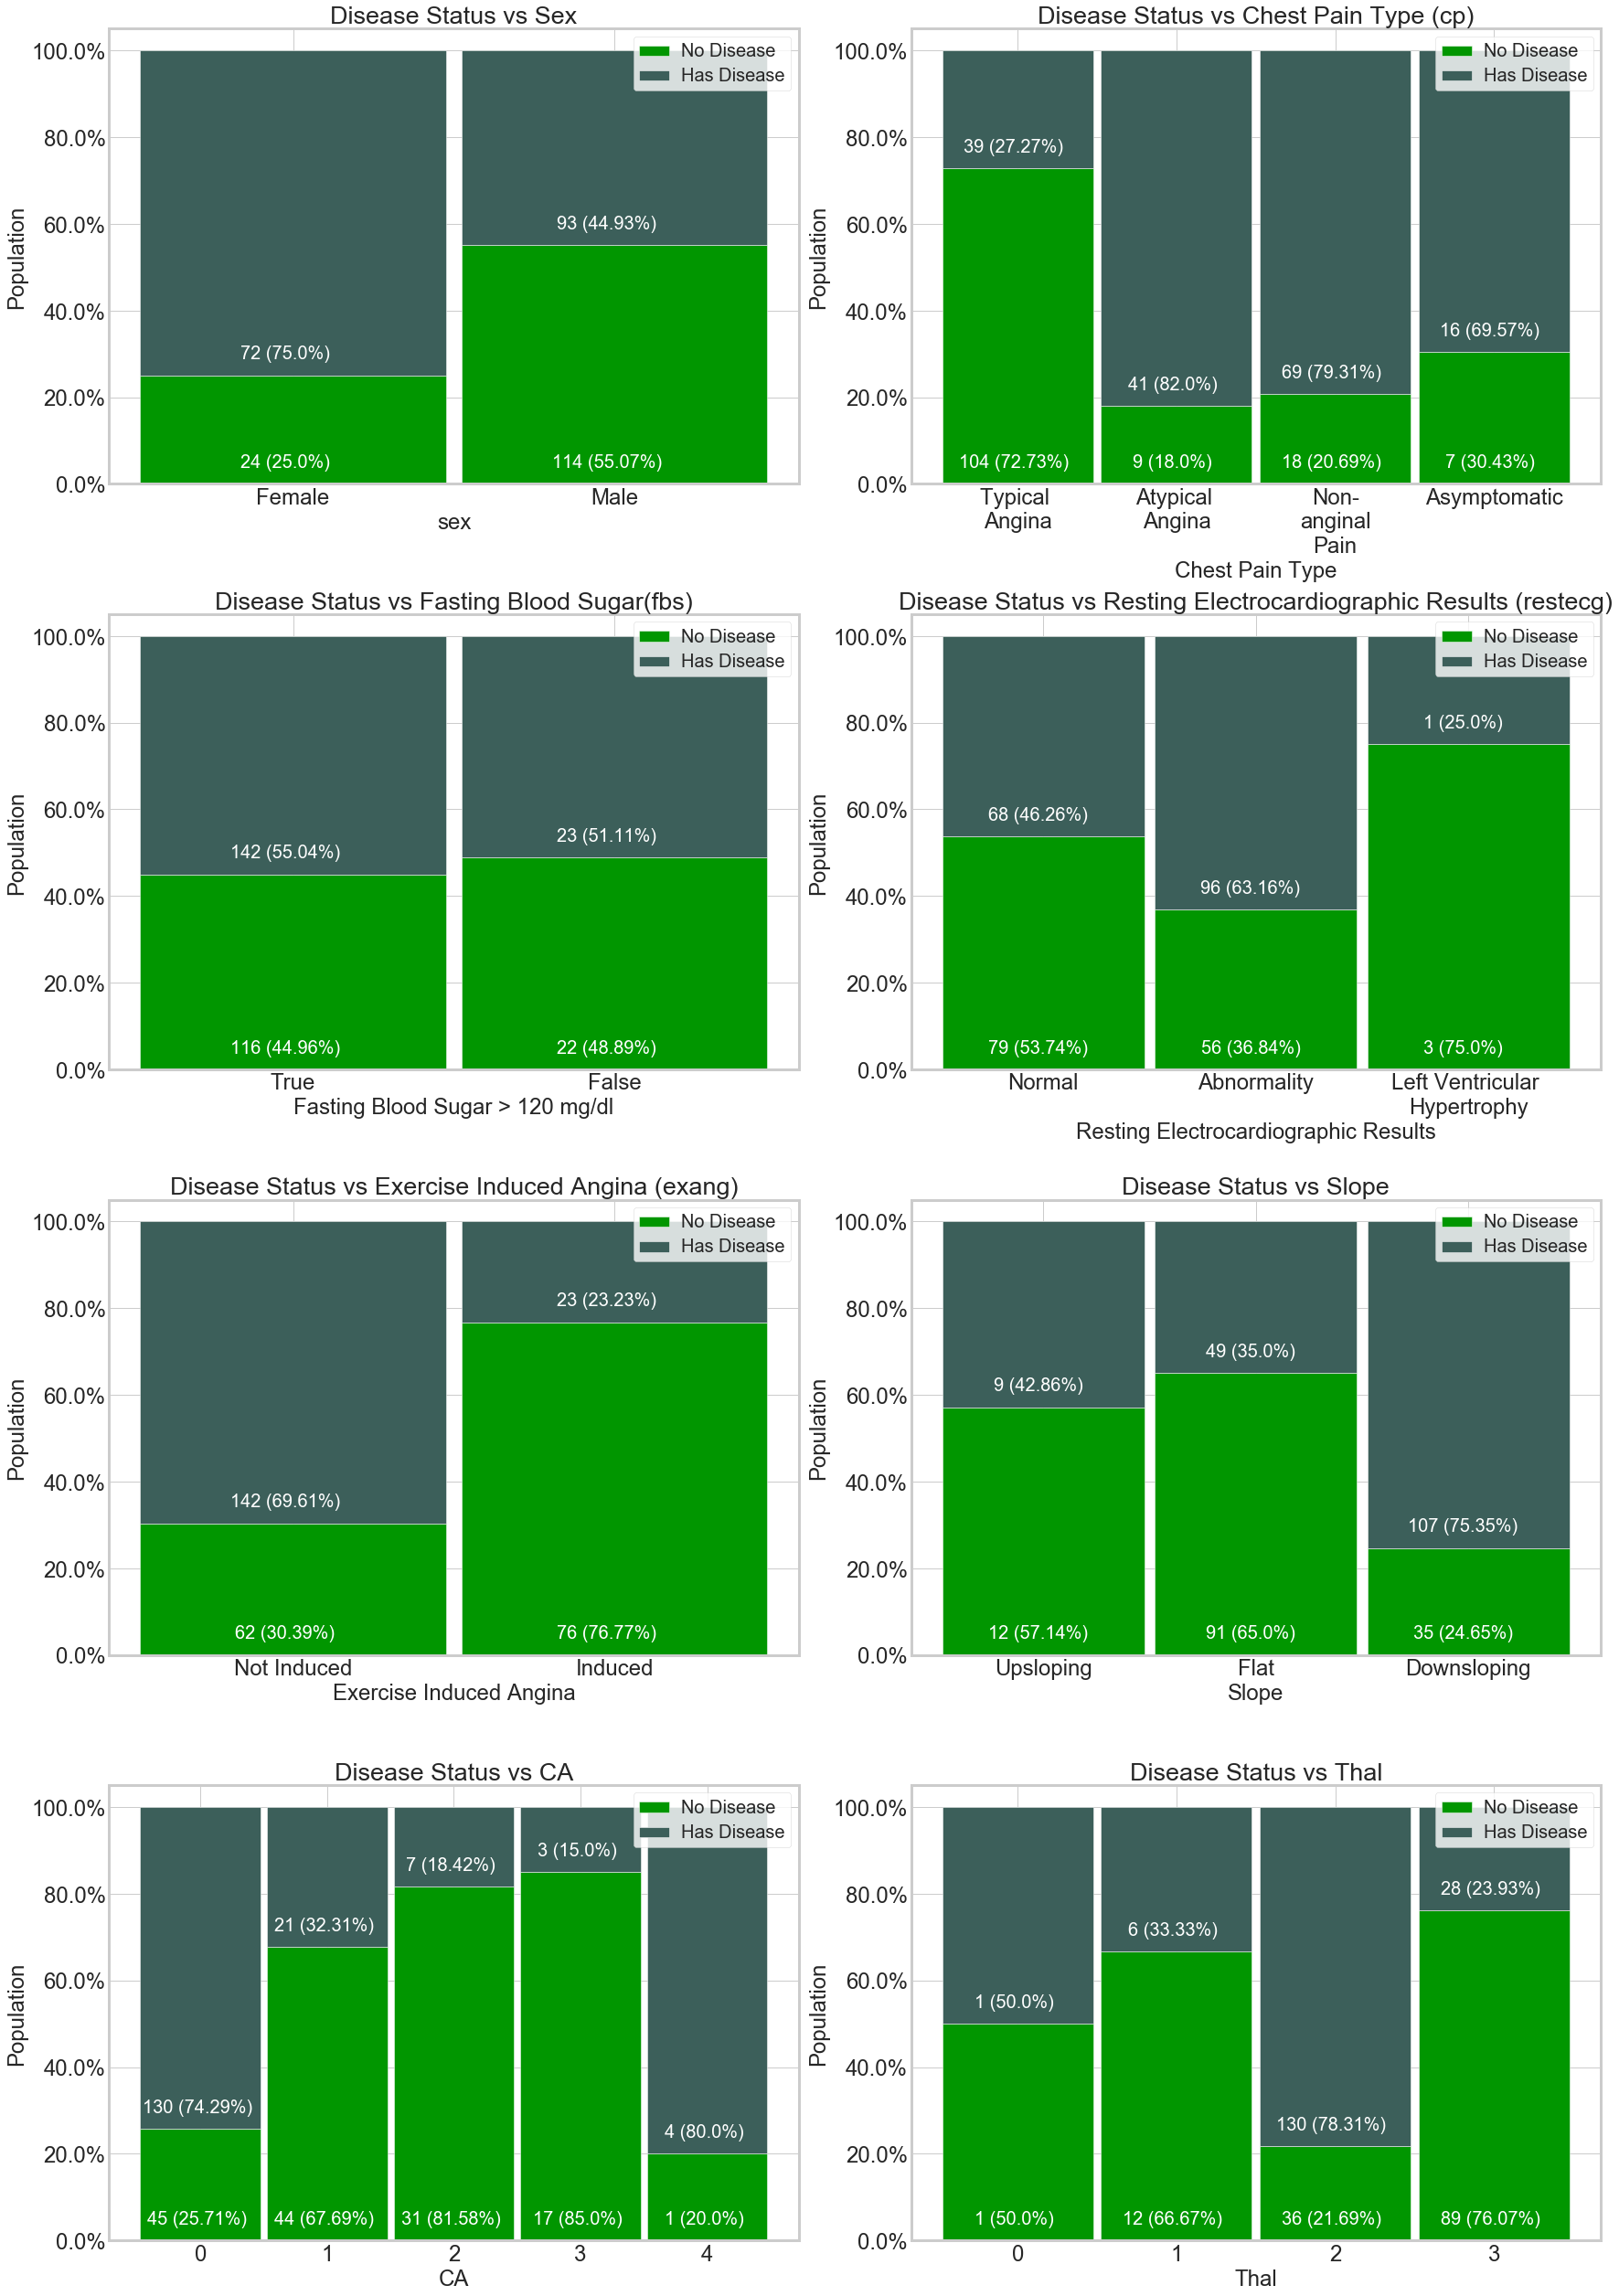

In [325]:
fig = plt.gcf()
fig.set_size_inches(25, 35)
grid_rows = 4
grid_cols = 2

# Draw Disease Status vs Sex chart
plt.subplot(grid_rows, grid_cols, 1)
temp = df[['sex','target']].groupby(['sex','target']).size().unstack('target')
temp.rename(index={0:'Female', 1:'Male'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Sex', ylabel = 'Population')

# Draw Disease Status vs Chest pain type chart
plt.subplot(grid_rows, grid_cols, 2)
temp = df[['cp','target']].groupby(['cp','target']).size().unstack('target')
temp.rename(index={0:'Typical \nAngina', 1:'Atypical \nAngina', 2:'Non-\nanginal\nPain',3:'Asymptomatic'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Chest Pain Type (cp)', ylabel = 'Population', xlabel = 'Chest Pain Type')

# Draw fbs - fasting blood sugar chart
plt.subplot(grid_rows, grid_cols, 3)
temp = df[['fbs','target']].groupby(['fbs','target']).size().unstack('target')
temp.rename(index={0:'True', 1:'False'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Fasting Blood Sugar(fbs)', ylabel = 'Population', xlabel = 'Fasting Blood Sugar > 120 mg/dl')

# Draw restecg - resting electrocardiographic results chart
plt.subplot(grid_rows, grid_cols, 4)
temp = df[['restecg','target']].groupby(['restecg','target']).size().unstack('target')
temp.rename(index={0:'Normal', 1:'Abnormality', 2:'Left Ventricular \nHypertrophy'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Resting Electrocardiographic Results (restecg)', ylabel = 'Population', xlabel = 'Resting Electrocardiographic Results')

# Draw exang - exercise induced angina chart
plt.subplot(grid_rows, grid_cols, 5)
temp = df[['exang','target']].groupby(['exang','target']).size().unstack('target')
temp.rename(index={0:'Not Induced', 1:'Induced'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Exercise Induced Angina (exang)', ylabel = 'Population', xlabel = 'Exercise Induced Angina')

# Draw slope - the slope of the peak exercise ST segment chart
plt.subplot(grid_rows, grid_cols, 6)
temp = df[['slope','target']].groupby(['slope','target']).size().unstack('target')
temp.rename(index={0:'Upsloping', 1:'Flat', 2:'Downsloping'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Slope', ylabel = 'Population', xlabel = 'Slope')

# Draw ca - number of major vessels (0-3) colored by flourosopy chart
plt.subplot(grid_rows, grid_cols, 7)
temp = df[['ca','target']].groupby(['ca','target']).size().unstack('target')
temp.rename(columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs CA', ylabel = 'Population', xlabel = 'CA')

# Draw thal chart
plt.subplot(grid_rows, grid_cols, 8)
temp = df[['thal','target']].groupby(['thal','target']).size().unstack('target')
temp.rename(columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Thal', ylabel = 'Population', xlabel = 'Thal')
fig.tight_layout()
#plt.show()
plt.savefig("Disease_Status.png",bbox_inches="tight",pad_inches=2)

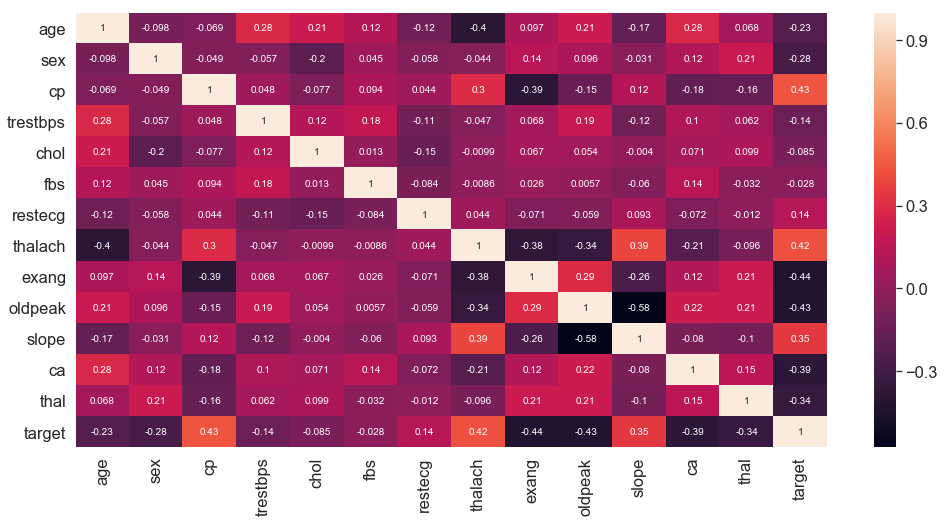

<Figure size 432x288 with 0 Axes>

In [236]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.heatmap(df.corr(), annot = True)
plt.show()
plt.savefig("Heatmap.png",bbox_inches="tight",pad_inches=2)

In [237]:
feature_cols=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
X=df[feature_cols]
Y=df.target

In [238]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [239]:
#Y_test

In [240]:
#Y_pred

In [241]:
clf = DecisionTreeClassifier(criterion="entropy")

In [242]:
clf = clf.fit(X_train,Y_train)

In [243]:
Y_pred = clf.predict(X_test)

In [244]:
from sklearn.metrics import confusion_matrix

In [245]:
dtree_cm_id3=confusion_matrix(Y_test,Y_pred)

In [246]:
accuracies={}

In [247]:
acc=metrics.accuracy_score(Y_test, Y_pred)*100
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))


Accuracy: 0.7252747252747253


In [248]:
accuracies['Decision Tree(ID3)'] = acc

In [249]:
from sklearn.externals.six import StringIO  

In [250]:
from IPython.display import Image

In [251]:
from sklearn.tree import export_graphviz

In [252]:
import pydotplus

In [253]:
dot_data = StringIO()

In [254]:
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names = feature_cols,class_names=['0','1'])

In [255]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [256]:
graph.write_png('heart11.png')

True

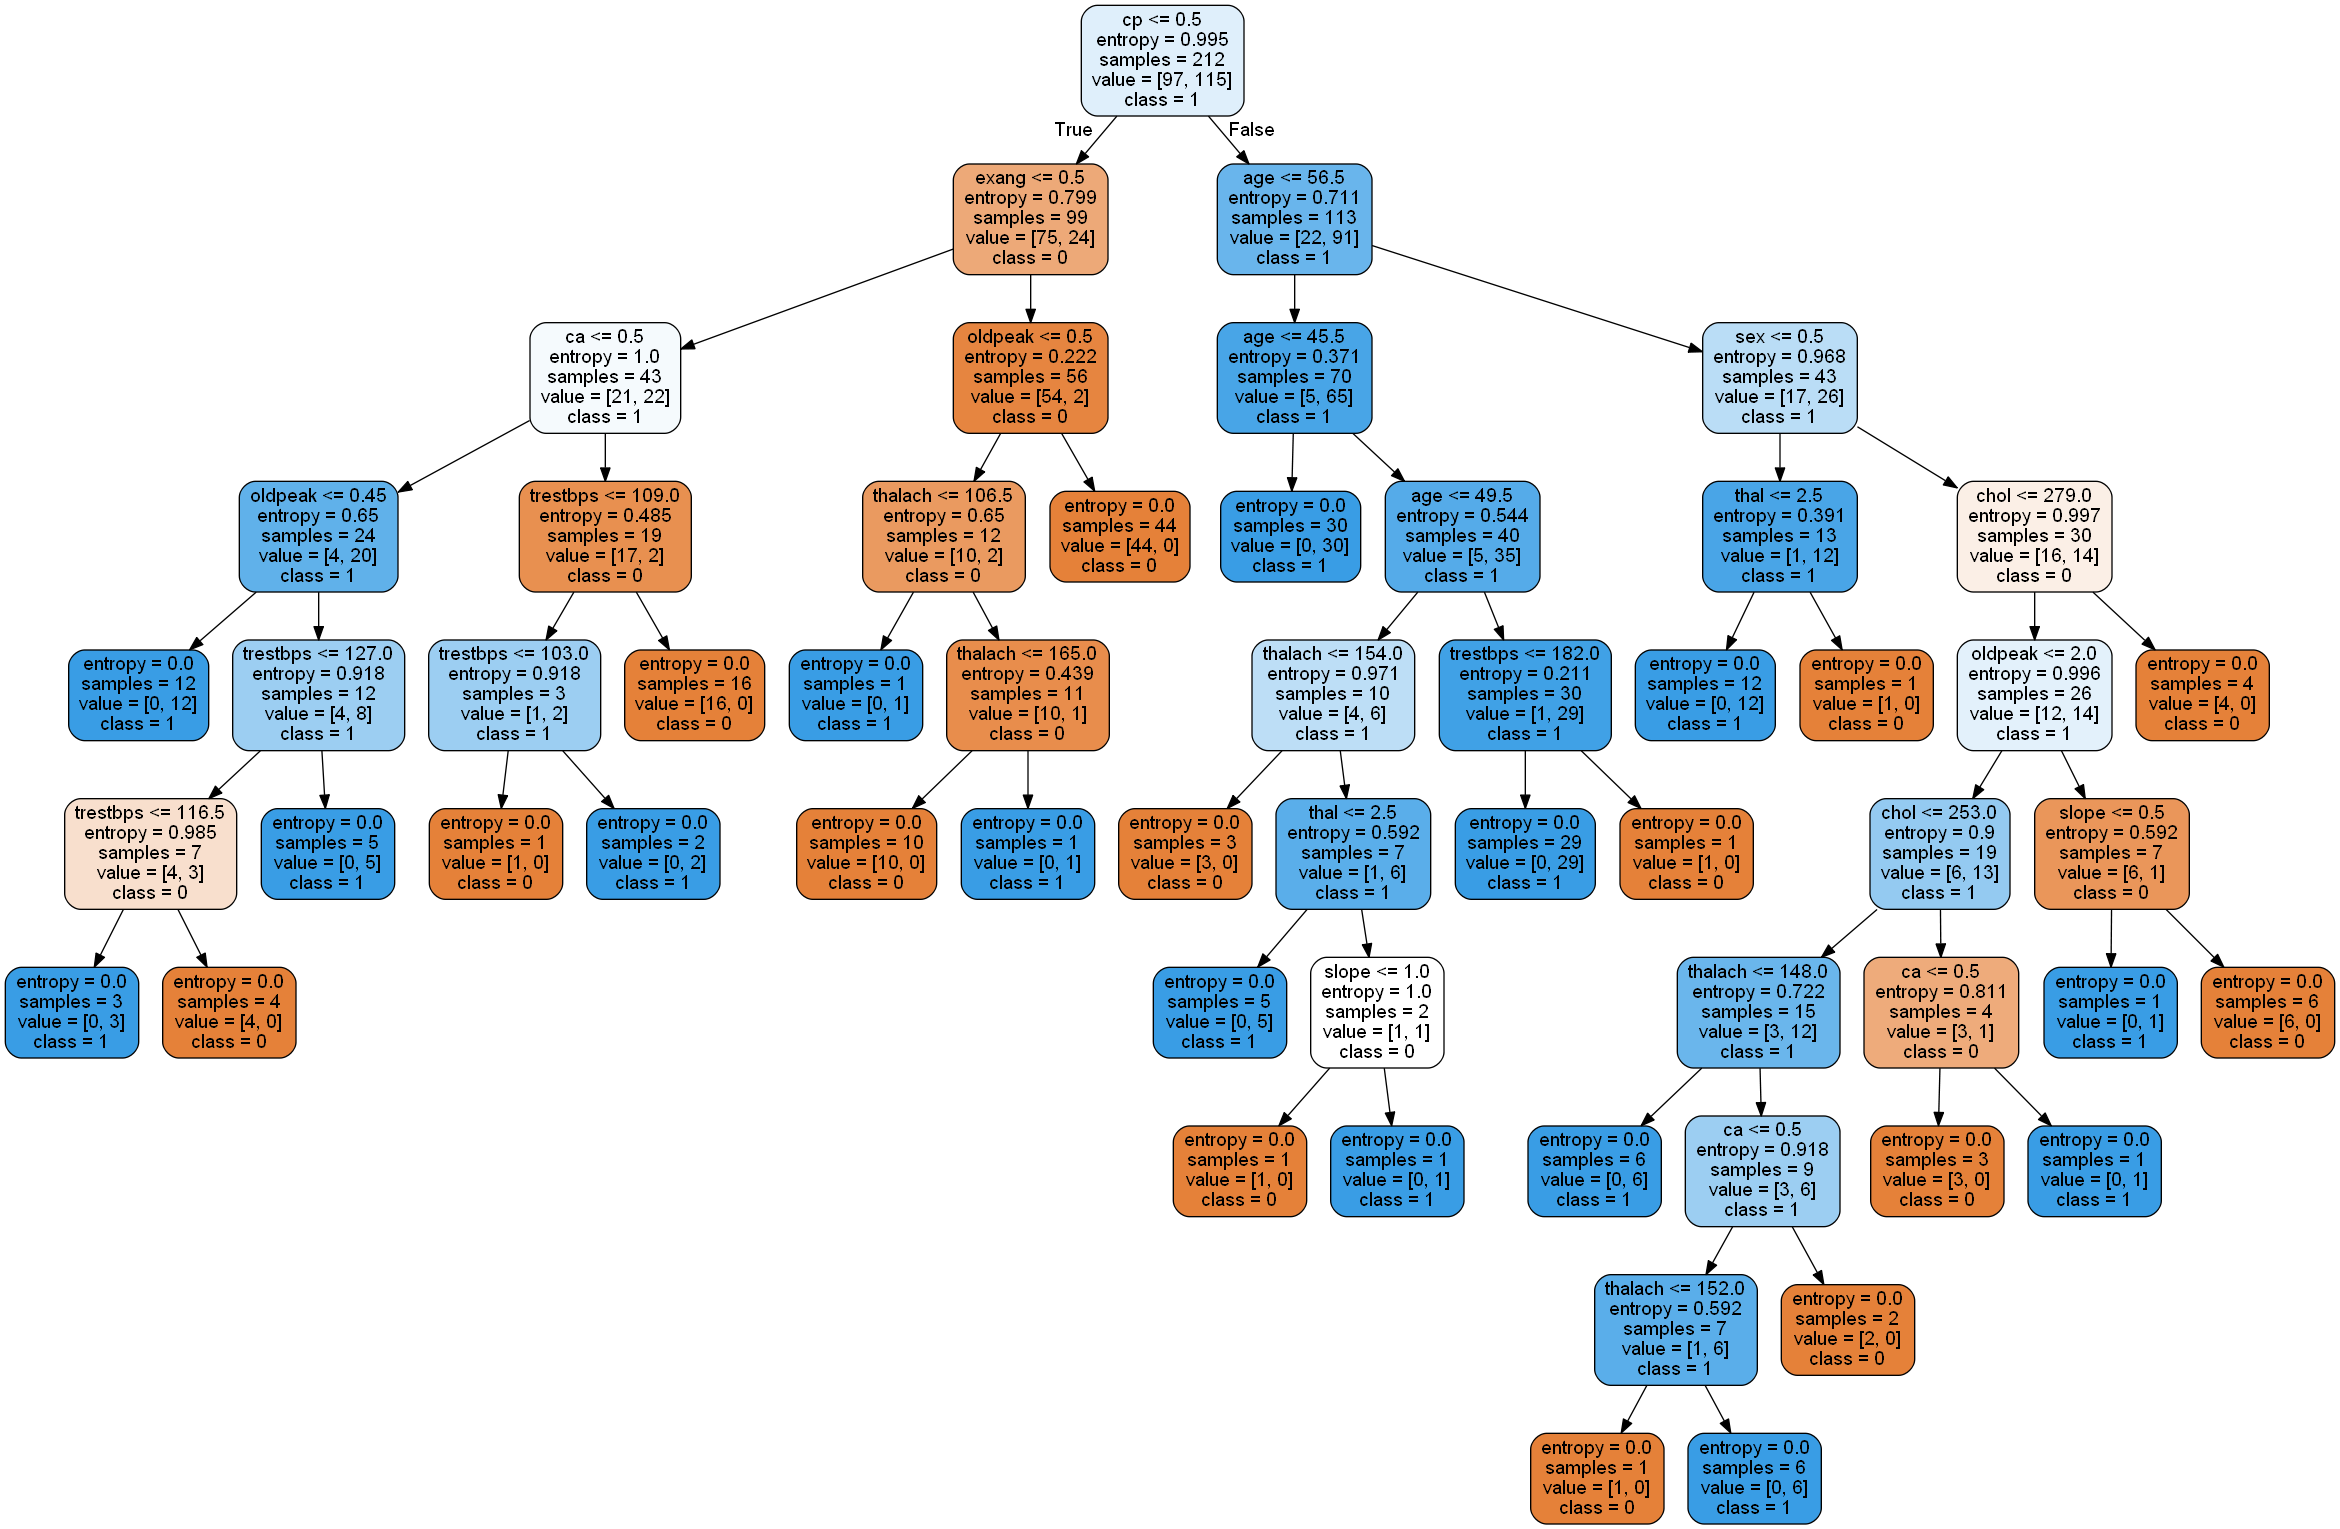

In [257]:
Image(graph.create_png())

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [258]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [259]:
feature_cols=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
X=df[feature_cols]
Y=df.target

In [260]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [261]:
clf=DecisionTreeClassifier()
clf=clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)


In [262]:
dtree_cm_cart=confusion_matrix(Y_test,Y_pred)

In [263]:
acc=metrics.accuracy_score(Y_test, Y_pred)*100
accuracies['Decision Tree(Cart)'] = acc

In [264]:
print("Accuracy:",metrics.accuracy_score(Y_test,Y_pred))

Accuracy: 0.7362637362637363


In [265]:
from sklearn.tree import export_graphviz

In [266]:
from sklearn.externals.six import StringIO

In [267]:
from IPython.display import Image

In [268]:
import pydotplus

In [269]:
dot_data=StringIO()

In [270]:
export_graphviz(clf,out_file=dot_data,
               filled=True,rounded=True,
               feature_names=feature_cols,
               class_names=['0','1'])

In [271]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

In [272]:
graph.write_png('heart12.png')

True

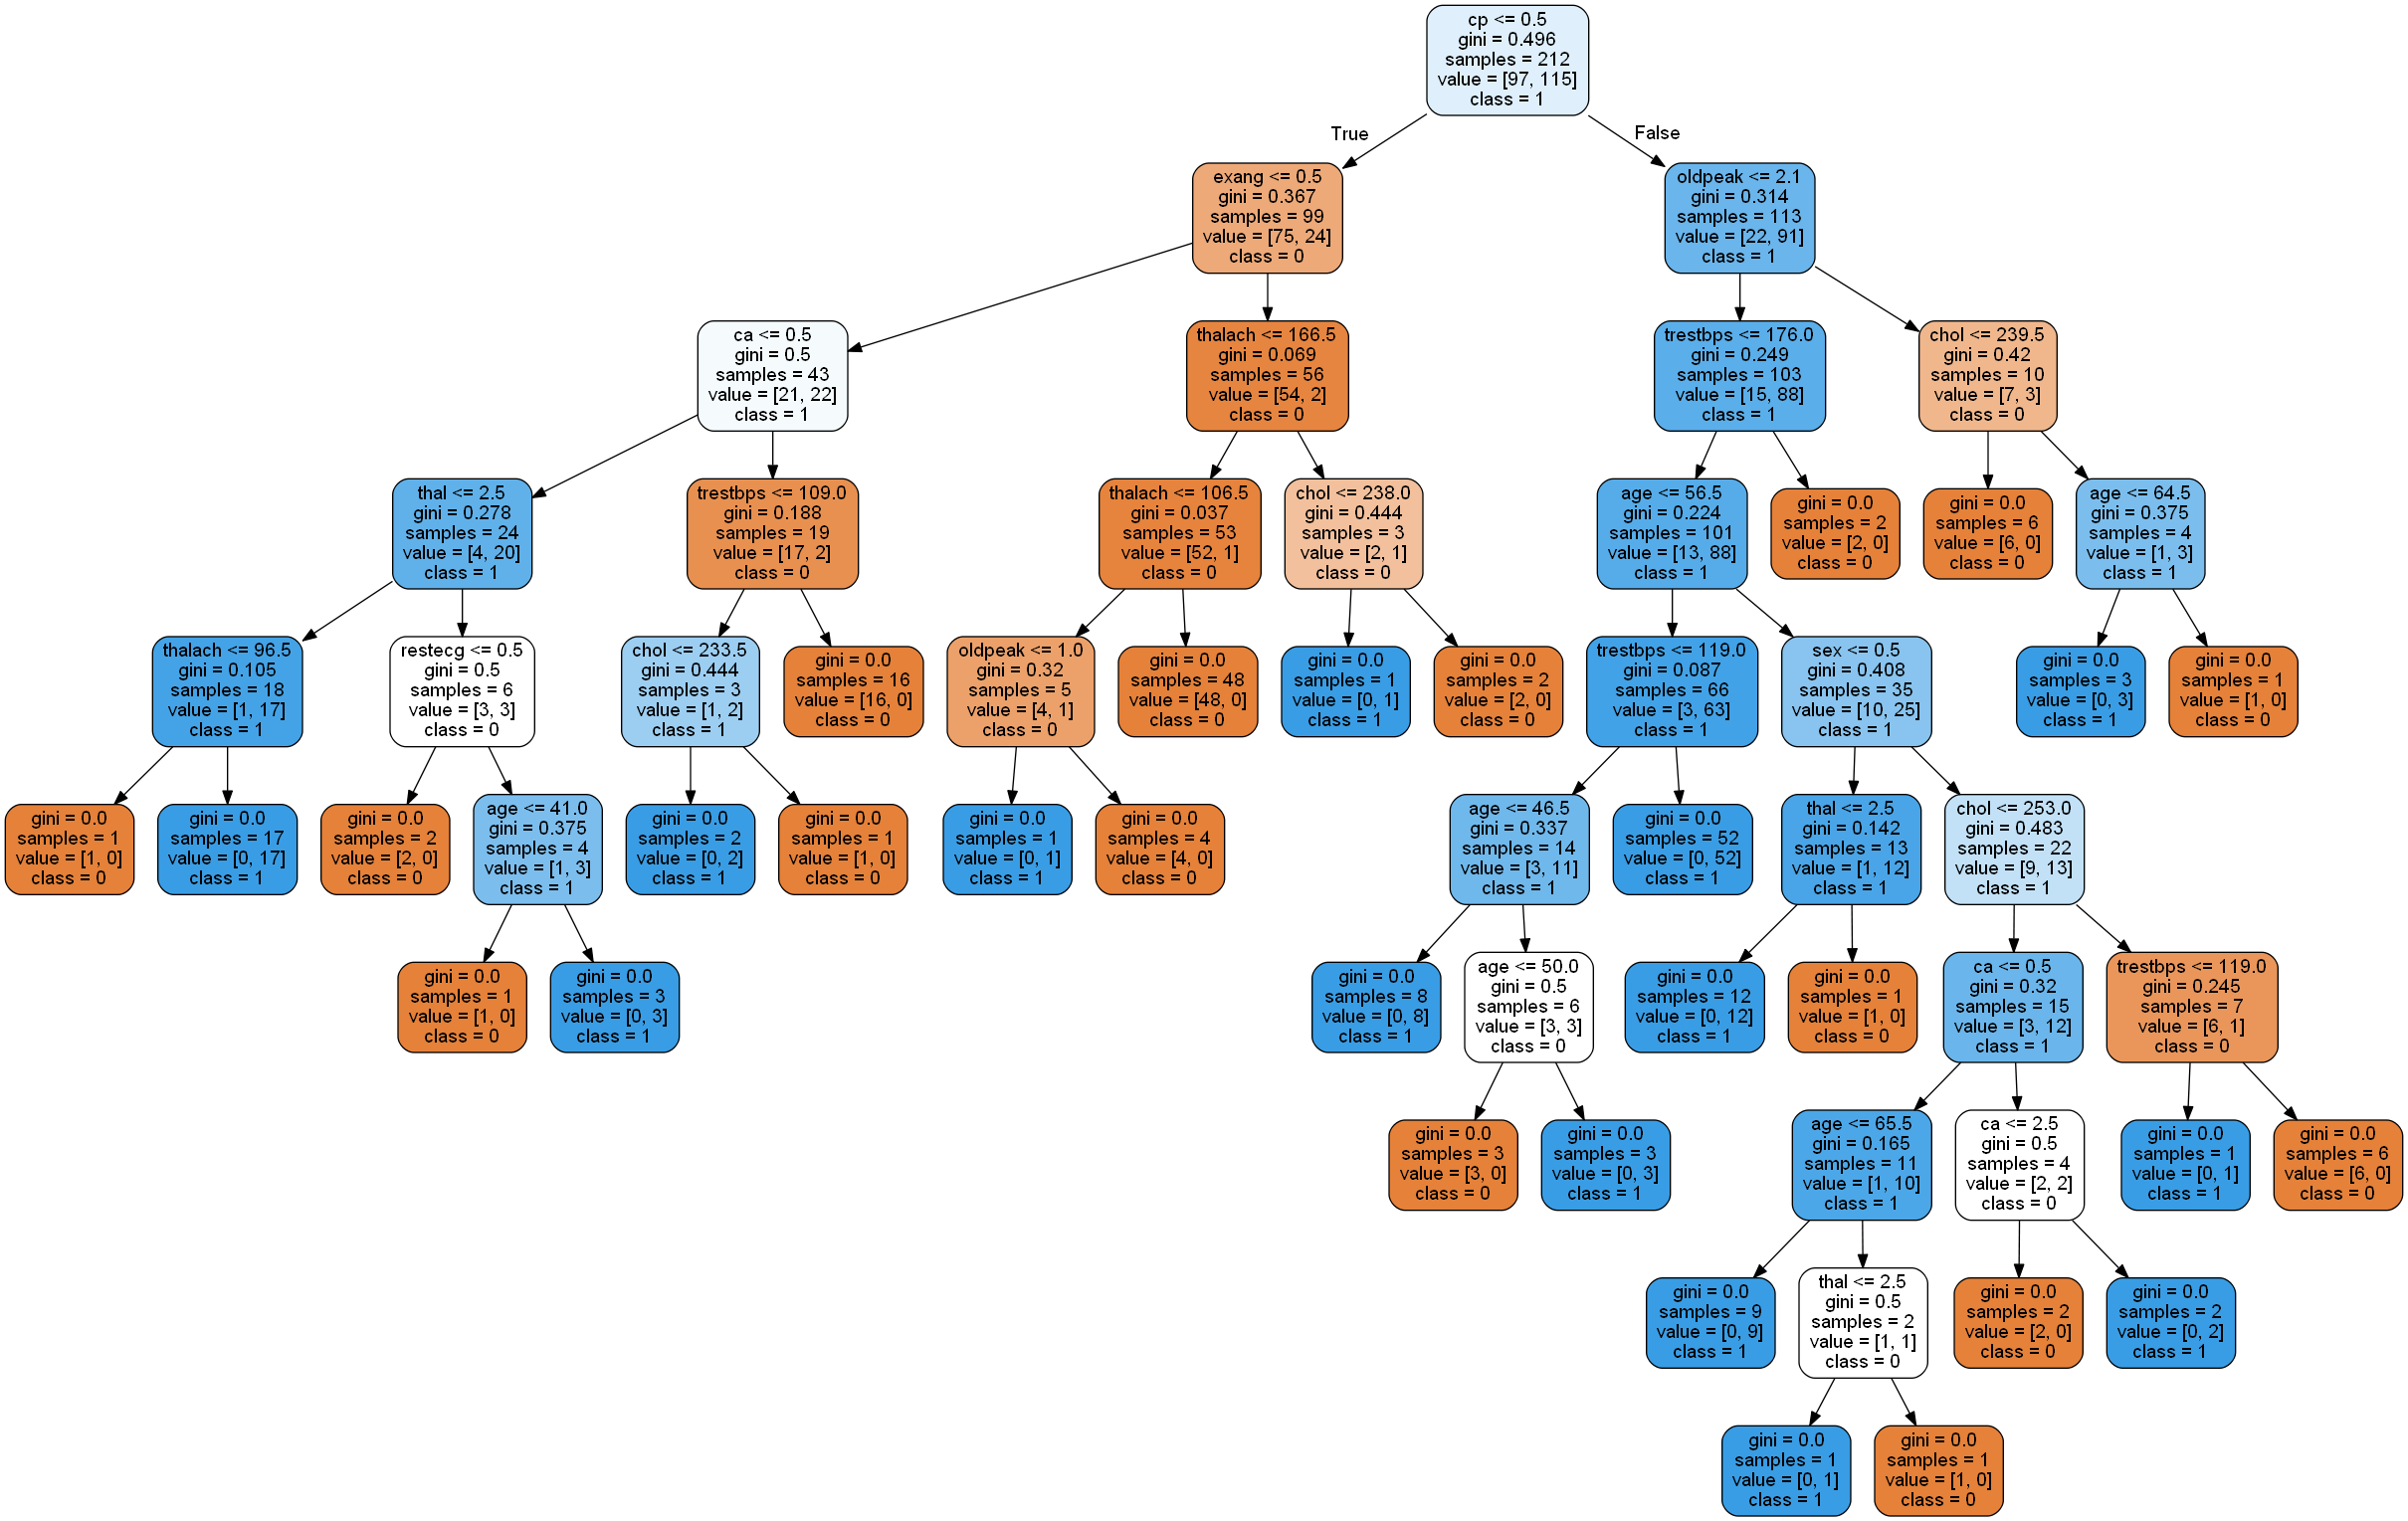

In [273]:
Image(graph.create_png())

In [274]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import random
from pprint import pprint

In [275]:
df=pd.read_csv("heart.csv")
#df=df.drop("Id",axis=1)

In [276]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [277]:
df=df.rename(columns={"target":"label"})

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
label       303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [279]:
def train_test_split(df,test_size):
    
    if isinstance(test_size,float):
        test_size=round(test_size * len(df))
        
    indices=df.index.tolist()    
    test_indices=random.sample(population=indices,k=test_size)
    print(type(test_indices))
    
    test_df=df.loc[test_indices]
    train_df=df.drop(test_indices)
    
    return train_df,test_df

In [280]:
random.seed(0)
train_df,test_df=train_test_split(df,test_size=23)

<class 'list'>


In [281]:
def train_test_split(df):
    
    
    indices=[204,159,219,174,184,295,269,119,193,154,51,249,278,229,208,302,58,220,18,228,11,300,70,138,122,164,191,80,27,123,157]    

    
    test_df=df.loc[indices]
    train_df=df.drop(indices)
    
    return train_df,test_df

In [282]:
random.seed(0)
train_df,test_df=train_test_split(df)

In [283]:
len(test_df)

31

In [284]:
def check_purity(data):
    
    label_columns=data[:,-1]
    unique_classes=np.unique(label_columns)
    if len(unique_classes) == 1:
        return True
    else:
        return False

In [285]:
def classify_data(data):
    
    label_columns=data[:,-1]
    unique_classes,counts_unique_classes=np.unique(label_columns,return_counts=True)
    index=counts_unique_classes.argmax()
    classification=unique_classes[index]
    
    return classification

In [286]:
def get_potential_splits(data):
    
    potential_splits={}
    _,n_columns=data.shape
    for column_index in range(n_columns-1):
        potential_splits[column_index]=[]
        values=data[:,column_index]
        unique_values=np.unique(values)

        for index in range(len(unique_values)):
            if index != 0:
                current_value=unique_values[index]
                previous_value=unique_values[index-1]
                potential_split=(current_value+previous_value)/2

                potential_splits[column_index].append(potential_split)
    
    return potential_splits

In [287]:
def split_data(data,split_column,split_value):
    
    split_column_values=data[:,split_column]
    
    data_below=data[split_column_values <= split_value]
    data_above=data[split_column_values > split_value]
    
    return data_below,data_above

In [288]:
def calculate_entropy(data):
    
    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
     
    return entropy

In [289]:
def calculate_overall_entropy(data_below, data_above):
    
    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_entropy =  (p_data_below * calculate_entropy(data_below) 
                      + p_data_above * calculate_entropy(data_above))
    
    return overall_entropy

In [290]:
def determine_best_split(data, potential_splits):
    
    overall_entropy = 9999
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)

            if current_overall_entropy <= overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value
    
    return best_split_column, best_split_value

In [291]:
def decision_tree_algorithm(df, counter=0, min_samples=2, max_depth=7):
    
    # data preparations
    if counter == 0:
        global COLUMN_HEADERS #, FEATURE_TYPES
        COLUMN_HEADERS = df.columns
        #FEATURE_TYPES = determine_type_of_feature(df)
        data = df.values
    else:
        data = df           
    
    
    # base cases
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        classification = classify_data(data)
        
        return classification

    
    # recursive part
    else:    
        counter += 1

        # helper functions 
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)
        
        # check for empty data
        #if len(data_below) == 0 or len(data_above) == 0:
         #   classification = classify_data(data)
          #  return classification
        
        # determine question
        feature_name = COLUMN_HEADERS[split_column]
        #type_of_feature = FEATURE_TYPES[split_column]
        #if type_of_feature == "continuous":
        question = "{} <= {}".format(feature_name, split_value)
            
        # feature is categorical
        #else:
         #   question = "{} = {}".format(feature_name, split_value)
        
        # instantiate sub-tree
        sub_tree = {question: []}
        
        # find answers (recursion)
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth)
        no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth)
        
        #sub_tree[question].append(yes_answer)
        #sub_tree[question].append(no_answer)
        
        # If the answers are the same, then there is no point in asking the qestion.
        # This could happen when the data is classified even though it is not pure
        # yet (min_samples or max_depth base case).
        #if yes_answer == no_answer:
         #   sub_tree = yes_answer
        #else:
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree

In [292]:
tree=decision_tree_algorithm(train_df, max_depth=9)
pprint(tree)

{'cp <= 0.5': [{'ca <= 0.5': [{'thal <= 2.5': [{'exang <= 0.5': [{'age <= 60.0': [1.0,
                                                                                  {'oldpeak <= 1.1': [{'chol <= 223.0': [1.0,
                                                                                                                         0.0]},
                                                                                                      1.0]}]},
                                                                 {'thalach <= 146.0': [0.0,
                                                                                       {'oldpeak <= 0.8': [1.0,
                                                                                                           {'oldpeak <= 2.2': [0.0,
                                                                                                                               1.0]}]}]}]},
                                               {'oldpeak <= 0.65': [{'ch

In [293]:
example = test_df.iloc[1]
example

age          56.0
sex           1.0
cp            1.0
trestbps    130.0
chol        221.0
fbs           0.0
restecg       0.0
thalach     163.0
exang         0.0
oldpeak       0.0
slope         2.0
ca            0.0
thal          3.0
label         1.0
Name: 159, dtype: float64

In [294]:
def classify_example(example, tree):
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split(" ")

    # ask question
    #if comparison_operator == "<=":
    if example[feature_name] <= float(value):
        answer = tree[question][0]
    else:
        answer = tree[question][1]
    
    # feature is categorical
    #else:
        #if str(example[feature_name]) == value:
            #answer = tree[question][0]
        #else:
            #answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):
        return answer
    
    # recursive part
    else:
        residual_tree = answer
        return classify_example(example, residual_tree)

In [295]:
classify_example(example, tree)

1.0

In [296]:
def calculate_accuracy(df, tree):

    df["classification"] = df.apply(classify_example, args=(tree,), axis=1)
    df["classification_correct"] = df["classification"] == df["label"]
    
    accuracy = df["classification_correct"].mean()
    
    return accuracy

In [297]:
accuracy = calculate_accuracy(test_df, tree)
accuracy

0.8709677419354839

In [298]:
accuracies['Decision Tree(ID3) From Scratch'] = accuracy*100

In [299]:
test_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,classification,classification_correct
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0,0.0,True
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1,1.0,True
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0,0.0,True
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0,0.0,True
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0,0.0,True
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0,0.0,True
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3,0,0.0,True
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2,1,1.0,True
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3,0,0.0,True
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1,1.0,True


In [300]:
#dtree_cm_cart=confusion_matrix(Y_test,Y_pred)

In [301]:
import numpy as np
import pandas as pd
%matplotlib inline

import random
from pprint import pprint

from decision_tree_functions import decision_tree_algorithm, decision_tree_predictions
from helper_functions import train_test_split, calculate_accuracy

In [302]:
df = pd.read_csv("heart2.csv")
df=df.rename(columns={"target":"label"})

In [303]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
1,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
2,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
3,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
4,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


In [304]:
random.seed(0)
train_df, test_df = train_test_split(df, test_size=0.1)

In [305]:
indices=[204,159,219,174,184,295,269,119,193,154,51,249,278,229,208,302,58,220,18,228,11,300,70,138,122,164,191,80,27,123,157]    

test_df=df.loc[indices]
train_df=df.drop(indices)

In [306]:
def bootstrapping(train_df, n_bootstrap):
    bootstrap_indices = np.random.randint(low=0, high=len(train_df), size=n_bootstrap)
    df_bootstrapped = train_df.iloc[bootstrap_indices]
    
    return df_bootstrapped

def random_forest_algorithm(train_df, n_trees, n_bootstrap, n_features, dt_max_depth):
    forest = []
    for i in range(n_trees):
        df_bootstrapped = bootstrapping(train_df, n_bootstrap)
        tree = decision_tree_algorithm(df_bootstrapped, max_depth=dt_max_depth, random_subspace=n_features)
        forest.append(tree)
    
    return forest

def random_forest_predictions(test_df, forest):
    df_predictions = {}
    for i in range(len(forest)):
        column_name = "tree_{}".format(i)
        predictions = decision_tree_predictions(test_df, tree=forest[i])
        df_predictions[column_name] = predictions

    df_predictions = pd.DataFrame(df_predictions)
    print(df_predictions)
    random_forest_predictions = df_predictions.mode(axis=1)[0]
    print("And Random Forest Prediction:::")
    print(random_forest_predictions)
    
    return random_forest_predictions

In [307]:
forest = random_forest_algorithm(train_df, n_trees=7, n_bootstrap=120, n_features=7, dt_max_depth=4)
predictions = random_forest_predictions(test_df, forest)
accuracy = calculate_accuracy(predictions, test_df.label)

print("Accuracy = {}".format(accuracy))

     tree_0  tree_1  tree_2  tree_3  tree_4  tree_5  tree_6
204     1.0     1.0     1.0     1.0     1.0     1.0     1.0
159     1.0     1.0     1.0     1.0     0.0     0.0     1.0
219     0.0     1.0     1.0     0.0     1.0     1.0     0.0
174     0.0     1.0     0.0     0.0     0.0     0.0     0.0
184     1.0     1.0     1.0     1.0     1.0     1.0     1.0
295     1.0     1.0     1.0     1.0     1.0     1.0     1.0
269     1.0     0.0     0.0     1.0     0.0     1.0     0.0
119     0.0     0.0     0.0     0.0     0.0     1.0     0.0
193     1.0     1.0     1.0     1.0     0.0     1.0     1.0
154     0.0     1.0     0.0     0.0     0.0     0.0     0.0
51      0.0     0.0     0.0     0.0     0.0     0.0     0.0
249     1.0     1.0     1.0     1.0     1.0     1.0     1.0
278     1.0     1.0     1.0     1.0     0.0     1.0     0.0
229     1.0     1.0     1.0     1.0     1.0     1.0     1.0
208     1.0     1.0     1.0     1.0     0.0     1.0     1.0
302     1.0     1.0     1.0     1.0     

In [308]:
accuracies['Random Forest From Scratch'] = accuracy*100

In [309]:
df.iloc[80].label

1.0

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


Average number of nodes 79
Average maximum depth 9


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


Recall Baseline: 1.0 Test: 0.92 Train: 1.0
Precision Baseline: 0.55 Test: 0.84 Train: 1.0
Roc Baseline: 0.5 Test: 0.93 Train: 1.0


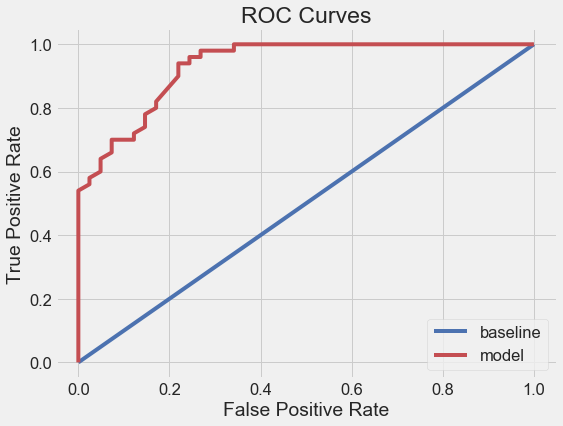

Confusion matrix, without normalization
[[32  9]
 [ 4 46]]


<Figure size 432x288 with 0 Axes>

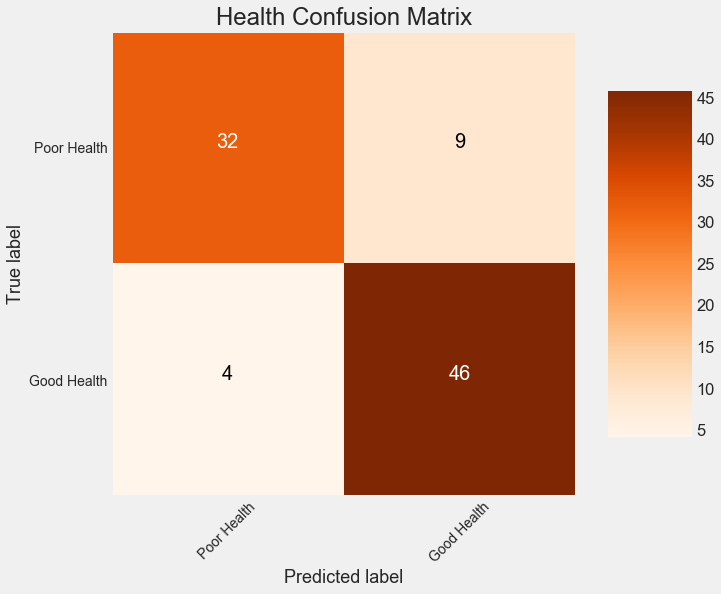

In [310]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

RSEED = 50



# Load in data
df = pd.read_csv('heart2.csv')

df=df.rename(columns={"target":"label"})

# Full dataset: https://www.kaggle.com/cdc/behavioral-risk-factor-surveillance-system

# Extract the labels
labels = np.array(df.pop('label'))

# 30% examples in test data
train, test, train_labels, test_labels = train_test_split(df,
                                         labels, 
                                         stratify = labels,
                                         test_size = 0.3, 
                                         random_state = RSEED)

# Imputation of missing values
train = train.fillna(train.mean())
test = test.fillna(test.mean())

# Features for feature importances
features = list(train.columns)

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data
model.fit(train, train_labels)


n_nodes = []
max_depths = []

# Stats about the trees in random forest
for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

# Training predictions (to demonstrate overfitting)
train_rf_predictions = model.predict(train)
train_rf_probs = model.predict_proba(train)[:, 1]

# Testing predictions (to determine performance)
rf_predictions = model.predict(test)
rf_probs = model.predict_proba(test)[:, 1]

from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18

def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, 
                                     [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, 
                                      [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); 
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();

evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)
plt.savefig('roc_auc_curve.png')

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Confusion matrix
cm = confusion_matrix(test_labels, rf_predictions)
plot_confusion_matrix(cm, classes = ['Poor Health', 'Good Health'],
                      title = 'Health Confusion Matrix')

plt.savefig('cm.png')

In [311]:
df = pd.read_csv("heart2.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
1,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
2,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
3,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
4,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


In [312]:
feature_cols=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
X=df[feature_cols]
Y=df.target

In [313]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

#X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
#y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3) # 70

In [314]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [315]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
accuracies['Random Forest Built In'] = (metrics.accuracy_score(y_test, y_pred))*100

Accuracy: 0.7582417582417582


In [316]:
clf.predict([[57,
1,
2,
150,
168,
0,
1,
174,
0,
1.6,
2,
0,
2]])

array([1], dtype=int64)

In [317]:
y_pred

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0], dtype=int64)

In [318]:
y_test

61     1
163    1
87     0
64     0
99     0
1      1
272    1
23     0
113    0
256    0
107    1
15     0
164    1
115    0
81     1
102    0
9      0
205    0
168    1
210    1
46     1
219    0
198    1
278    1
185    1
41     1
34     1
141    1
82     0
161    1
      ..
251    1
220    1
242    1
84     0
298    0
93     1
54     0
55     0
239    1
154    0
85     0
37     0
127    1
38     0
21     0
63     1
134    0
143    1
293    0
156    0
8      0
215    1
152    1
3      1
119    0
92     1
71     1
214    0
142    1
145    0
Name: target, Length: 91, dtype: int64

In [319]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

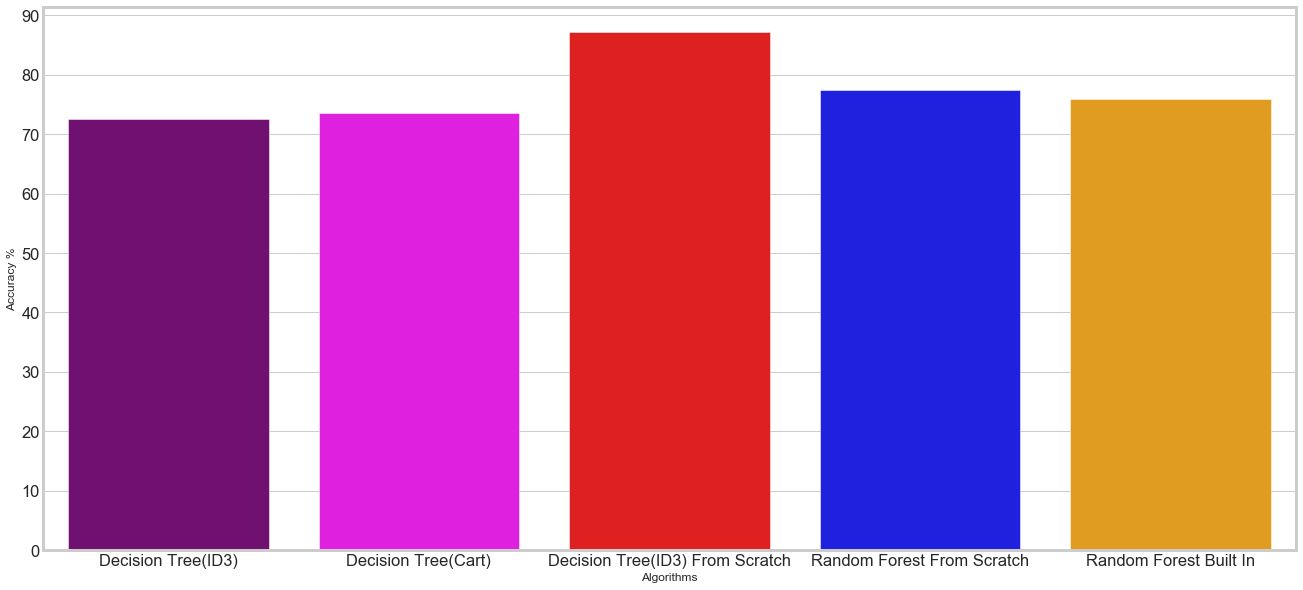

In [320]:
colors = ["purple", "magenta", "red", "blue", "orange"]

sns.set_style("whitegrid")
#plt.figure(figsize=(16,5))
plt.figure(figsize=(20,10))
plt.yticks(np.arange(0,200,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
#plt.show()
plt.savefig("Accuracy_Comparison.png",bbox_inches="tight",pad_inches=2)

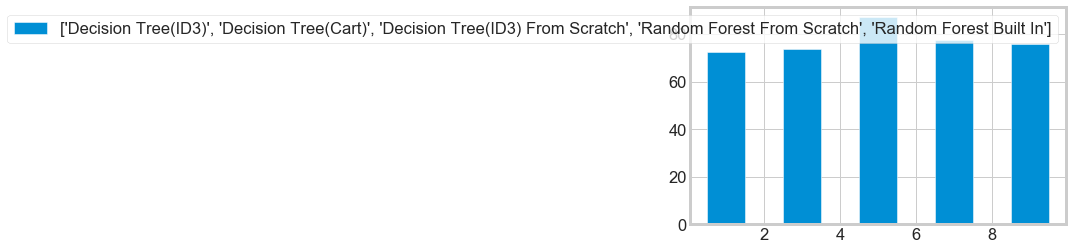

In [321]:
import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
#langs = ['C', 'C++', 'Java', 'Python', 'PHP']
#students = [23,17,35,29,12]
xx=[1,3,5,7,9]
y=list(accuracies.values())
width=1
plt.bar(xx, y, width,label=list(accuracies.keys()))
plt.legend()
plt.show()

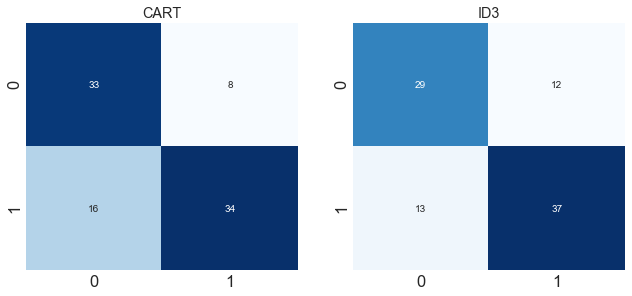

In [326]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.title("CART")
sns.heatmap(dtree_cm_cart,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.subplot(2,4,2)
plt.title("ID3")
sns.heatmap(dtree_cm_id3,annot=True,cmap="Blues",fmt="d",cbar=False)

#plt.show()
plt.savefig("Confusion_Matrix.png",bbox_inches="tight",pad_inches=2)

NameError: name 'bayes_cm' is not defined

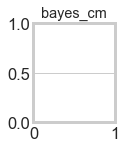

In [323]:
plt.subplot(2,4,3)
plt.title("bayes_cm")
sns.heatmap(bayes_cm,annot=True,cmap="Oranges",fmt="d",cbar=False)
plt.subplot(2,4,4)
plt.title("RandomForest")
sns.heatmap(rdf_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.subplot(2,4,5)
plt.title("SVM_classifier_cm")
sns.heatmap(svr_cm,annot=True,cmap="Reds",fmt="d",cbar=False)
plt.subplot(2,4,6)
plt.title("DecisionTree_cm")
sns.heatmap(dtree_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.subplot(2,4,7)
plt.title("kNN_cm")
sns.heatmap(knn_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [ ]:
# Predicted values
y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)

In [ ]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)


In [ ]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()